# Exploring [DANDI:001275](https://neurosift.app/dandiset/001275) - Mental Navigation in Primate PPC

**⚠️ Note: This notebook was AI-generated with human supervision and has not been fully verified. Please be cautious when interpreting the code or results.**

This notebook explores neural recordings from the posterior parietal cortex (PPC) during a mental navigation task. The data is from a study where macaques performed a mental navigation task, moving between landmarks on a linear track while neural activity was recorded from PPC.

The task structure is:
1. Subject is presented with a start and target landmark from a linear track with 6 landmarks
2. After a delay, the subject uses a joystick to navigate from start to target
3. Importantly, visual landmarks and movement feedback are occluded, requiring pure mental navigation

This data is associated with: https://doi.org/10.1038/s41586-024-07557-z
Data from entorhinal cortex recordings is available at: https://doi.org/10.48324/dandi.000897/0.240605.1710

## Loading Required Packages

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset
We'll examine a session from subject 'amadeus' recorded on January 4, 2020.

In [2]:
# Open the NWB file using lindi (for remote access) and pynwb
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001275/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

print("Session Info:")
print(f"Subject: {nwb.subject.subject_id}")
print(f"Date: {nwb.session_start_time}")
print(f"Species: {nwb.subject.species}")
print(f"Age: {nwb.subject.age}")
print(f"Lab: {nwb.lab}")

# Print unit quality information
qualities = nwb.processing['ecephys']['units']['quality'][:]
unique_qualities, counts = np.unique(qualities, return_counts=True)
print("\nUnit Quality Distribution:")
for q, c in zip(unique_qualities, counts):
    print(f"{q}: {c}")

Session Info:
Subject: amadeus
Date: 2020-01-04 00:00:00-05:00
Species: Macaca mulatta
Age: P10Y
Lab: Jazayeri, Fiete

Unit Quality Distribution:
good: 25
mua: 20
noise: 22
unsorted: 1


## Understanding Trial Structure

Let's examine the trial structure and durations. Each trial represents a mental navigation from a start landmark to a target landmark.

Trial Duration Statistics (first 100 trials, seconds):
Mean: 5.29
Median: 4.95
Min: 2.72
Max: 11.44


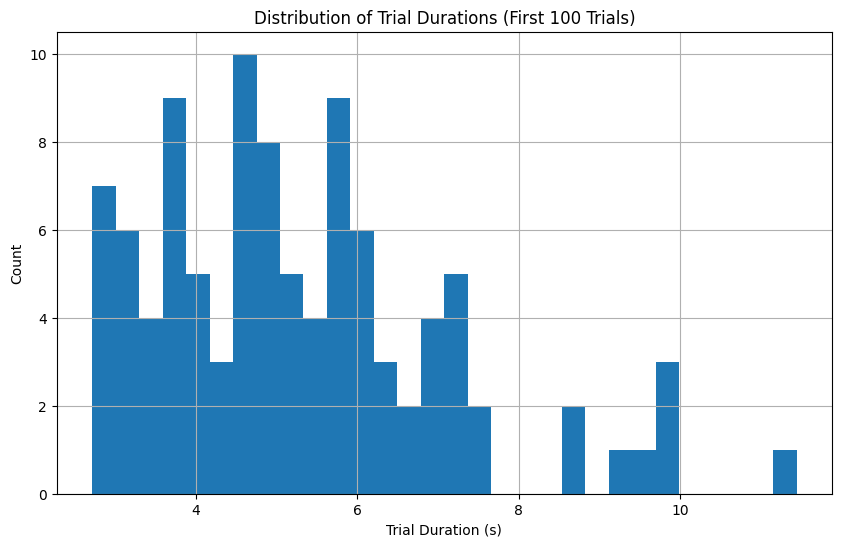


First 5 trials:
Trial 1: duration = 7.41s
Trial 2: duration = 5.32s
Trial 3: duration = 4.51s
Trial 4: duration = 3.02s
Trial 5: duration = 3.70s


In [3]:
# Get trial durations for first 100 trials
trial_starts = nwb.intervals['trials']['start_time'][:100]
trial_stops = nwb.intervals['trials']['stop_time'][:100]
trial_durations = trial_stops - trial_starts

print("Trial Duration Statistics (first 100 trials, seconds):")
print(f"Mean: {np.mean(trial_durations):.2f}")
print(f"Median: {np.median(trial_durations):.2f}")
print(f"Min: {np.min(trial_durations):.2f}")
print(f"Max: {np.max(trial_durations):.2f}")

plt.figure(figsize=(10, 6))
plt.hist(trial_durations, bins=30)
plt.xlabel('Trial Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations (First 100 Trials)')
plt.grid(True)
plt.show()

# Print first few trials
print("\nFirst 5 trials:")
for i in range(5):
    print(f"Trial {i+1}: duration = {trial_durations[i]:.2f}s")

## Behavioral Data: Hand Position

The hand position data represents the subject's joystick movements during navigation. 
Let's look at an example trial to understand the behavioral response.

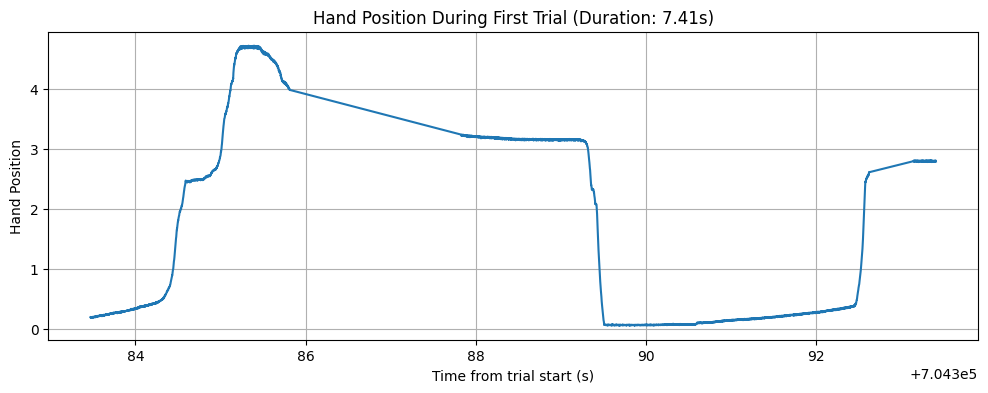


Hand Position Statistics:
Sampling rate: 746.16 Hz
Position range: 0.06 to 4.73


In [4]:
# Get first trial period
first_trial_start = trial_starts[0]
first_trial_stop = trial_stops[0]

# Get hand position data for first trial
hand_pos = nwb.processing['behavior']['hand_position']
sample_rate = 1000  # Approximate based on data
start_idx = int(first_trial_start * sample_rate)
n_samples = int((first_trial_stop - first_trial_start) * sample_rate)

# Load just the data we need
trial_times = hand_pos.timestamps[start_idx:start_idx + n_samples]
trial_positions = hand_pos.data[start_idx:start_idx + n_samples]

plt.figure(figsize=(12, 4))
plt.plot(trial_times - first_trial_start, trial_positions)
plt.xlabel('Time from trial start (s)')
plt.ylabel('Hand Position')
plt.title(f'Hand Position During First Trial (Duration: {first_trial_stop - first_trial_start:.2f}s)')
plt.grid(True)
plt.show()

print("\nHand Position Statistics:")
print(f"Sampling rate: {1/np.mean(np.diff(trial_times)):.2f} Hz")
print(f"Position range: {np.min(trial_positions):.2f} to {np.max(trial_positions):.2f}")

## Neural Data: Single Unit Activity

The dataset contains recordings from 68 units in the posterior parietal cortex (PPC), with 25 classified as good quality units.
Let's examine the firing rates and patterns during navigation.

Firing Rate Statistics (Good Units Only):
Mean firing rate: 11.08 Hz
Median firing rate: 9.02 Hz
Min firing rate: 1.01 Hz
Max firing rate: 31.22 Hz


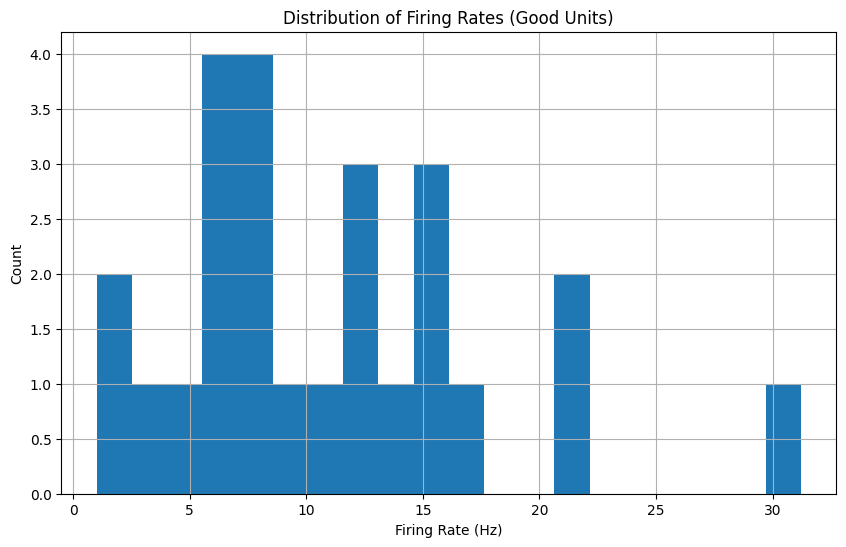

In [5]:
# Get statistics about good units
units = nwb.processing['ecephys']['units']
good_unit_indices = [i for i, q in enumerate(units['quality'][:]) if q == 'good']
good_firing_rates = units['fr'][:][good_unit_indices]

print("Firing Rate Statistics (Good Units Only):")
print(f"Mean firing rate: {np.mean(good_firing_rates):.2f} Hz")
print(f"Median firing rate: {np.median(good_firing_rates):.2f} Hz")
print(f"Min firing rate: {np.min(good_firing_rates):.2f} Hz")
print(f"Max firing rate: {np.max(good_firing_rates):.2f} Hz")

# Plot firing rate distribution
plt.figure(figsize=(10, 6))
plt.hist(good_firing_rates, bins=20)
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Count')
plt.title('Distribution of Firing Rates (Good Units)')
plt.grid(True)
plt.show()

## Example Analysis: Neural Activity During a Trial

Let's examine how neural firing patterns relate to the navigation behavior.
We'll look at spikes from good units during the first trial.

Spike counts during first trial:


Unit 0: 11 spikes


Unit 1: 11 spikes


Unit 2: 33 spikes


Unit 3: 42 spikes


Unit 4: 6 spikes


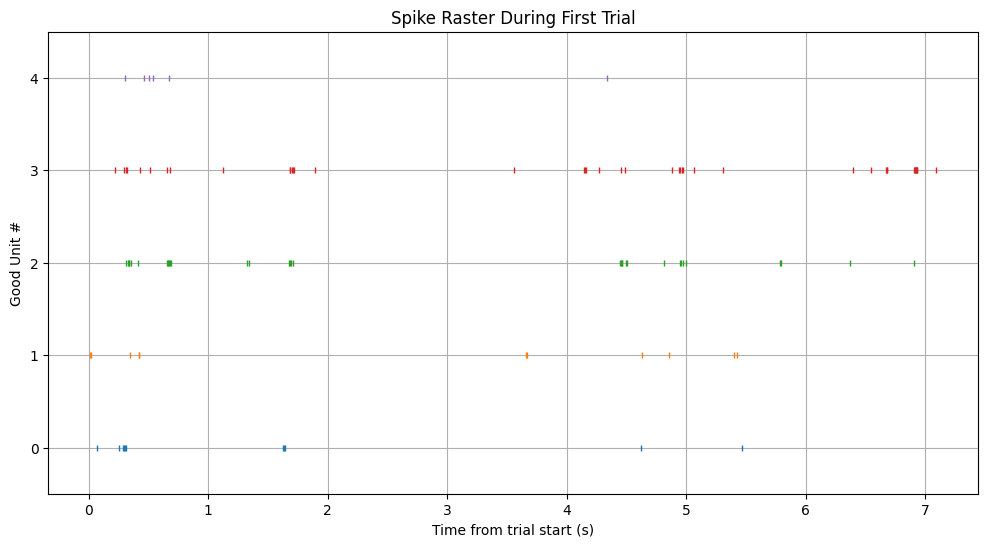

In [6]:
# Plot spike raster for first few good units during trial 1
plt.figure(figsize=(12, 6))
print("Spike counts during first trial:")

for plot_idx, unit_idx in enumerate(good_unit_indices[:5]):
    spike_times = np.array(units['spike_times'][unit_idx])
    trial_spikes_mask = (spike_times >= first_trial_start) & (spike_times <= first_trial_stop)
    trial_spikes = spike_times[trial_spikes_mask]
    
    if len(trial_spikes) > 0:
        plt.plot(trial_spikes - first_trial_start, np.ones_like(trial_spikes) * plot_idx, '|', markersize=5)
        print(f"Unit {plot_idx}: {len(trial_spikes)} spikes")
    else:
        print(f"Unit {plot_idx}: No spikes")

plt.xlabel('Time from trial start (s)')
plt.ylabel('Good Unit #')
plt.title('Spike Raster During First Trial')
plt.ylim(-0.5, 4.5)
plt.grid(True)
plt.show()

## Next Steps

To further analyze this dataset, you might:
1. Examine how neural activity varies with movement direction or speed
2. Look for neural representations of position along the virtual track
3. Compare activity patterns between different length trajectories
4. Analyze neural dynamics during the delay period before movement

The complete dataset includes multiple sessions from two subjects (amadeus and mahler), allowing for comparison across sessions and subjects.